In [109]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft
from functools import partial
from scipy import signal
import requests
from datetime import datetime

%matplotlib inline

In [124]:
def showPlots(plots):
    colors = ['#06d6a0', '#ee6c4d', '#277da1','#5a189a','#f3722c']
    plotCount = 0
    
    for i in range(len(plots)):
        if 'same' not in plots[i] or plots[i]['same'] == False:
            plotCount+=1
            
    fig, axs = plt.subplots(plotCount)
    if plotCount == 1:
        axs = [axs]
    pid = 0
    for i in range(len(plots)):
        if 'same' in plots[i] and plots[i]['same'] == True and pid > 0:
            pid -= 1   
        else:
            axs[pid].grid()
        if 'x' not in plots[i]:
            if 'sc' in plots[i] and plots[i]['sc'] == True:
                axs[pid].scatter(plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
            else:
                axs[pid].plot(plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        else:
            if 'sc' in plots[i] and plots[i]['sc'] == True:
                axs[pid].scatter(plots[i]['x'][:len(plots[i]['data'])], plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
            else:
                axs[pid].plot(plots[i]['x'][:len(plots[i]['data'])], plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])

        
        axs[pid].legend(loc = 'upper right')
        
        pid+=1

In [125]:
api_key = "dk6g1w736tm81f51qhr9re"

In [162]:
def gen_request_str(currency, data = 'assets'):
    return 'https://api.lunarcrush.com/v2?data='+str(data)+'&key='+api_key+'&symbol='+str(currency)+'&data_points=700'

In [163]:
response = requests.get(gen_request_str('BTC'))
if response.status_code == 200:
    print('Got it')
elif response.status_code == 404:
    print('WRONG REQUEST')

Got it


In [164]:
time_stamps = response.json()['data'][0]['timeSeries']

In [165]:
class Plot:
    def __init__(self):
        self.data = []
        self.x = []
    def addPoint(self, data, x=None):
        self.data.append(data)
        if x is not None:
            self.x.append(x)
            
    def getData(self):
        return self.data
    
    def getX(self):
        return self.x

class CryptPlot(Plot):
    def __init__(self):
        super(CryptPlot, self).__init__()

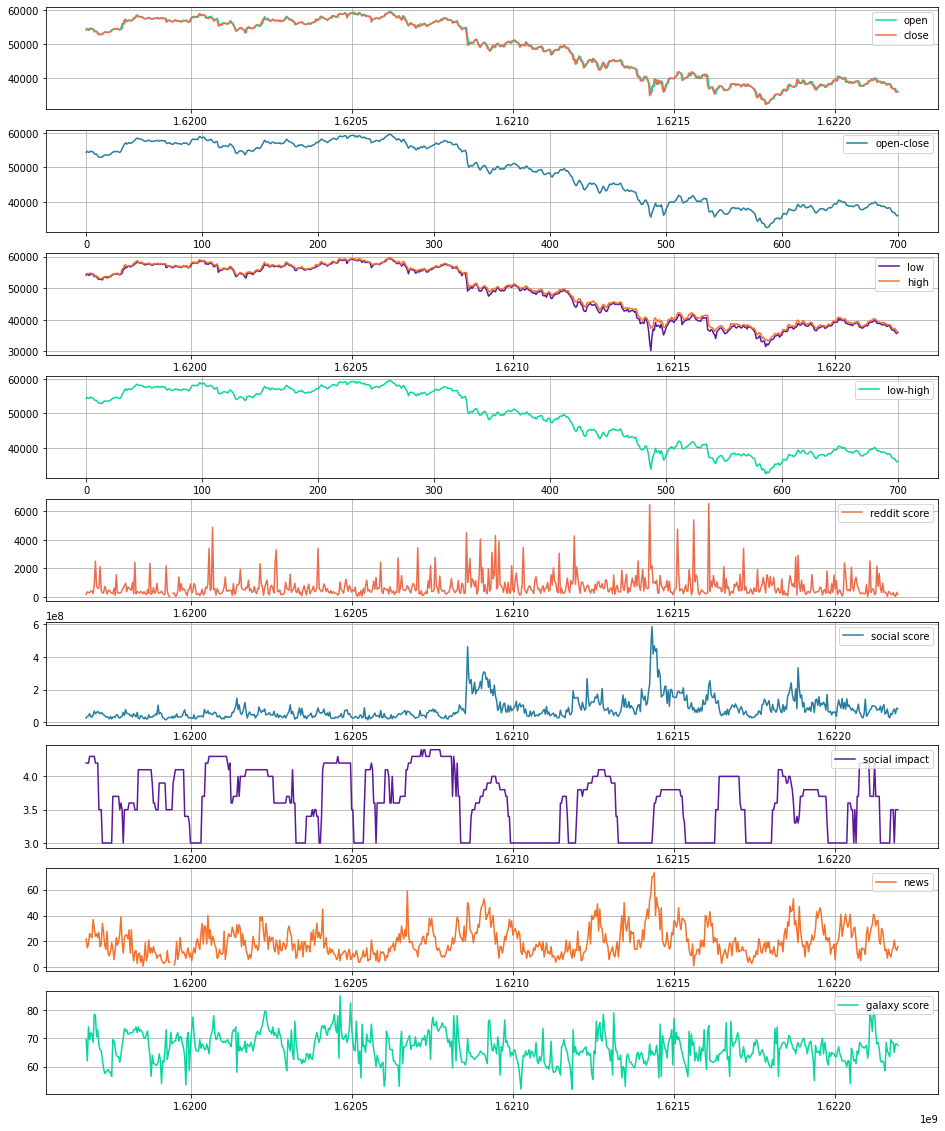

In [168]:
plt.rcParams['figure.figsize'] = [16, 20]

def getCandle(time_stamp):
    return time_stamp['open'], time_stamp['close'], time_stamp['low'], time_stamp['high']
#get basic scores of plot
def getScores(time_stamp):
    return time_stamp['reddit_posts_score'], time_stamp['social_score'], time_stamp['social_impact_score'],\
        time_stamp['news'], time_stamp['galaxy_score']

opens = CryptPlot()
closes = CryptPlot()
lows = CryptPlot()
highs = CryptPlot()

reddit_scores = CryptPlot()
social_scores = CryptPlot()
soc_impact = CryptPlot()
news_data = CryptPlot()
galaxy_scores = CryptPlot()

for i in range(len(time_stamps)):
    candle = getCandle(time_stamps[i])
    scores = getScores(time_stamps[i])
    
    timestamp = time_stamps[i]['time']
    dt_object = datetime.fromtimestamp(timestamp)

    opens.addPoint(candle[0], timestamp)
    closes.addPoint(candle[1], timestamp)
    lows.addPoint(candle[2], timestamp)
    highs.addPoint(candle[3], timestamp)
    #cosials
    reddit_scores.addPoint(scores[0], timestamp)
    social_scores.addPoint(scores[1], timestamp)
    soc_impact.addPoint(scores[2], timestamp)
    news_data.addPoint(scores[3], timestamp)
    galaxy_scores.addPoint(scores[4], timestamp)

showPlots([
    {'data': opens.getData(), 'label': 'open', 'x': opens.getX()},
    {'data': closes.getData(), 'label': 'close', 'same':True, 'x': closes.getX()},
    {'data': list(map(lambda x, y: (x+y)*0.5, closes.getData(), opens.getData())), 'label': 'open-close'},
    {'data': lows.getData(), 'label': 'low', 'x': lows.getX()},
    {'data': highs.getData(), 'label': 'high', 'same':True, 'x': highs.getX()},
    {'data': list(map(lambda x, y: (x+y)*0.5, lows.getData(), highs.getData())), 'label': 'low-high'},
    {'data': reddit_scores.getData(), 'label': 'reddit score', 'x': reddit_scores.getX()},
    {'data': social_scores.getData(), 'label': 'social score', 'x': social_scores.getX()},
    {'data': soc_impact.getData(), 'label': 'social impact', 'x': soc_impact.getX()},
    {'data': news_data.getData(), 'label': 'news', 'x': news_data.getX()},
    {'data': galaxy_scores.getData(), 'label': 'galaxy score', 'x': galaxy_scores.getX()}
])

In [169]:
dt_object = datetime.fromtimestamp(1622098800)
dt_object.day

27